# What do people want to learn about in data science?


在这个项目中，我们将假装我们正在为一家创建数据科学内容的公司工作，无论是书籍，在线文章，视频还是基于文本的交互式平台，如DataQuest。

On this project, we'll pretend we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like DataQuest.

a question that you have to answer is what is it that people want to learn about in data science.
This study aims to find answers to that question. By analyzing data for the (proxy) question: "What questions do people ask about Data science?".


This notebook contains the following sections:
1. Introduction
2. Extracting the data
3. Exploring and cleaning the data
4. Popular tags, further analysis
5. Deep learning, popularity over time
6. Conclusion

![Stack Exchange sites](https://dq-content.s3.amazonaws.com/469/se_sites.png)

# Data Extraction and Exploration

Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database. From the Database Schema,  we can see that the database contains the following 29 tables:
- `Posts`
- `Users`
- `Comments`
- `Badges`
- `CloseAsOffTopicReasonTypes`
- `CloseReasonTypes`
- `FlagTypes`
- `PendingFlags`
- `PostFeedback`
- `PostHistory`
- `PostHistoryTypes`
- `PostLinks`
- `PostNotices`
- `PostNoticeTypes`
- `PostsWithDeleted`
- `PostTags`
- `PostTypes`
- `ReviewRejectionReasons`
- `ReviewTaskResults`
- `ReviewTaskResultTypes`
- `ReviewTasks`
- `ReviewTaskStates`
- `ReviewTaskTypes`
- `SuggestedEdits`
- `SuggestedEditVotes`
- `Tags`
- `TagSynonyms`
- `Votes`
- `VoteTypes`

In [3]:
# Do not run this just for the record
# %%sql
# SELECT Id, 
#        CreationDate,
#        AcceptedAnswerId, 
#        Score, 
#        ViewCount, 
#        Tags, 
#        AnswerCount, 
#        CommentCount, 
#        FavoriteCount   
#   FROM Posts
#  WHERE PostTypeId=1
#    AND CreationDate LIKE '%2021%';

In [4]:
#library the packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno 
import operator
from functools import reduce

In [5]:
questions_2021 = pd.read_csv("QueryResults_2021.csv")
questions_2021.head()

,Id,CreationDate,AcceptedAnswerId,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,87391,2021-01-01 03:10:42,87411.0,1,39,<decision-trees>,1,0,NaN
1,87392,2021-01-01 07:28:07,NaN,0,53,<machine-learning><python><deep-learning><imag...,1,0,NaN
2,87393,2021-01-01 08:07:33,NaN,1,22,<neural-network><deep-learning><inception>,0,0,NaN
3,87395,2021-01-01 10:31:51,NaN,1,46,<machine-learning><cloud><federated-learning>,1,3,1.0
4,87404,2021-01-01 18:00:21,NaN,1,64,<reinforcement-learning><openai-gym>,1,0,NaN


There are many columns contains a lot of missing values. Let's check the whole dataframe.

In [6]:
# checking the number of entries条目
print("Number of question asked in 2021:",len(questions_2021))
print("\n")
#checking the missing value 
print(f"MISSING VALUES%:\n{round(100*questions_2021.isnull().sum()/len(questions_2021))}")

Number of question asked in 2021: 5841


MISSING VALUES%:
Id                   0.0
CreationDate         0.0
AcceptedAnswerId    77.0
Score                0.0
ViewCount            0.0
Tags                 0.0
AnswerCount          0.0
CommentCount         0.0
FavoriteCount       90.0
dtype: float64


<AxesSubplot:>

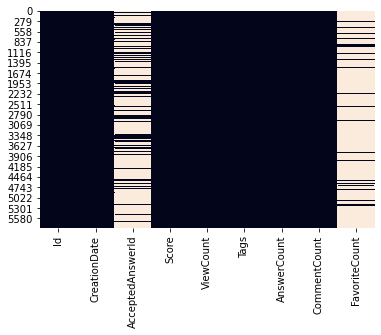

In [7]:
# visualzing the missing calues bu menas of misssingno library

import seaborn as sns
sns.heatmap(questions_2021.isnull(), cbar=False)

只有2列，和 ，有缺失值（分别为75%和88%）。在第一种情况下，我们没有任何办法来解决，所以我们必须放弃这一列。在第二种情况下，我们要用0.AcceptedAnswerIdFavoriteCount来填补缺失的值。

Only 2 columns, and , have missing values (77% and 90% correspondingly). In the first case we don't have any way to fix it, so we'll have to drop this column. In the second case we're going to fill the missing values with 0. AcceptedAnswerId  FavoriteCount

In [8]:
questions_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5841 non-null   int64  
 1   CreationDate      5841 non-null   object 
 2   AcceptedAnswerId  1352 non-null   float64
 3   Score             5841 non-null   int64  
 4   ViewCount         5841 non-null   int64  
 5   Tags              5841 non-null   object 
 6   AnswerCount       5841 non-null   int64  
 7   CommentCount      5841 non-null   int64  
 8   FavoriteCount     575 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 410.8+ KB


We see that some columns have inadequate data types. We're going to fix it soon, according to the following scheme:

Column|Data type
-|-
CreationDate|datetime
Tags|object
all the others|int

# data clean 

First, we're going to deal with missing values: to drop the `AcceptedAnswerId` column and to fill with 0 the missing values in the `FavoriteCount` column.

In [9]:
# drop the column
questions_2021 = questions_2021.drop(['AcceptedAnswerId'],axis='columns')


In [10]:
# filling the missing value 
questions_2021['FavoriteCount'] = questions_2021['FavoriteCount'].fillna(0)

Next we are going to fix the wrong data types according to the scheme above

In [11]:
#converting data types
questions_2021['CreationDate'] = questions_2021['CreationDate'].astype('datetime64')
questions_2021['FavoriteCount'] = questions_2021['FavoriteCount'].astype('int64')
questions_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5841 non-null   int64         
 1   CreationDate   5841 non-null   datetime64[ns]
 2   Score          5841 non-null   int64         
 3   ViewCount      5841 non-null   int64         
 4   Tags           5841 non-null   object        
 5   AnswerCount    5841 non-null   int64         
 6   CommentCount   5841 non-null   int64         
 7   FavoriteCount  5841 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 365.2+ KB


Cleaning the tag coloumns 


In [12]:
questions_2021.loc[2,'Tags']

'<neural-network><deep-learning><inception>'

We can then split on , to obtain a list.

In [13]:
# transformiing values in the Tags coloumn into list of string

questions_2021['Tags'] = questions_2021['Tags'].str.replace('><',',')\
                                                .str.replace('<','')\
                                                .str.replace('>','')\
                                                .str.split(',')

# double - checking the results
print(questions_2021.loc[2,'Tags'])

['neural-network', 'deep-learning', 'inception']


In [14]:
questions_2021.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,CommentCount,FavoriteCount
0,87391,2021-01-01 03:10:42,1,39,[decision-trees],1,0,0
1,87392,2021-01-01 07:28:07,0,53,"[machine-learning, python, deep-learning, imag...",1,0,0
2,87393,2021-01-01 08:07:33,1,22,"[neural-network, deep-learning, inception]",0,0,0
3,87395,2021-01-01 10:31:51,1,46,"[machine-learning, cloud, federated-learning]",1,3,1
4,87404,2021-01-01 18:00:21,1,64,"[reinforcement-learning, openai-gym]",1,0,0


# Exploring Most Popular Tags

Now that we have our dataframe adjusted, let's extract some information from it. In particular, we're interested in finding out what tags, other than `deep-learning`, are strongly related to the deep learning sphere. In other words, we want to know what questions should be classified as deep learning questions. For this purpose, we'll create a dictionary of all the tags used in combination with the `deep-learning` tag and their corresponding frequencies, and then explore them.

In [43]:
questions_2021[['Score','ViewCount','AnswerCount','FavoriteCount']].describe()

,Score,ViewCount,AnswerCount,FavoriteCount
count,5841.000000,5841.000000,5841.000000,5841.000000
mean,0.677281,148.279404,0.679336,0.101353
std,0.991460,512.799763,0.724379,0.348185
min,-2.000000,3.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000
50%,0.000000,42.000000,1.000000,0.000000
75%,1.000000,102.000000,1.000000,0.000000
max,14.000000,16662.000000,6.000000,5.000000


We see that for each column the corresponding ranges are currently the following:
- scores: from -2 to 14,
- number of views: from 3 to 16662,
- number of answers: from 0 to 6,
- number of times a question was favored: from 0 to 5.

Next, we're going to create a dataframe containing each unique tag with the number of times it was used in the questions, sorted in descending order. Additionally, we'll create a dataframe for the TOP10 used tags.

In [49]:
tags_used_dict ={}
for lst in questions_2021['Tags']:
    for tag in lst:
        if not tag in tags_used_dict:
            tags_used_dict[tag] = 0
        tags_used_dict[tag] +=1
tags_used_dict

{'decision-trees': 120,
 'machine-learning': 1567,
 'python': 1089,
 'deep-learning': 845,
 'image-classification': 136,
 'image-preprocessing': 44,
 'neural-network': 533,
 'inception': 8,
 'cloud': 5,
 'federated-learning': 3,
 'reinforcement-learning': 96,
 'openai-gym': 9,
 'optimization': 85,
 'categorical-data': 61,
 'mathematics': 43,
 'theory': 17,
 'parameter-estimation': 12,
 'cnn': 248,
 'lstm': 184,
 'rnn': 83,
 'accuracy': 71,
 'metric': 42,
 'loss': 16,
 'regression': 216,
 'visualization': 98,
 'graphs': 37,
 'tableau': 17,
 'powerbi': 5,
 'matplotlib': 43,
 'text': 27,
 'clustering': 190,
 'xgboost': 96,
 'data-science-model': 128,
 'scikit-learn': 345,
 'k-means': 59,
 'python-3.x': 70,
 'seaborn': 9,
 'dataset': 246,
 'hyperparameter-tuning': 59,
 'k-nn': 46,
 'predictive-modeling': 134,
 'machine-learning-model': 173,
 'supervised-learning': 56,
 'keras': 457,
 'tensorflow': 446,
 'numpy': 68,
 'random-forest': 127,
 'classification': 478,
 'data-analysis': 76,
 'ove

In [58]:
# Defining a function for creating a daraframe form a dictionart
# sort in descending order
def create_sorted_df_from_dict(dictionary,new_df_column_name):

    #creating a dataframe form the dictionary
    df = pd.DataFrame.from_dict(dictionary,orient='index').reset_index()
    #
    #rename the columns
    df.columns = ['Tag',new_df_column_name]

    # sorting in descending order
    df = df.sort_values(new_df_column_name,ascending=False).reset_index(drop=True)
    return df,df.head(10)

    # creating 2 dataframes:tags with corresponding counts and the TOP!) used tags
tags_uesd,top10_used = create_sorted_df_from_dict(
                                                    dictionary=tags_used_dict,
                                                    new_df_column_name='Count'
                                                    )
top10_used


,Tag,Count
0,machine-learning,1567
1,python,1089
2,deep-learning,845
3,neural-network,533
4,nlp,510
5,classification,478
6,keras,457
7,tensorflow,446
8,time-series,347
9,scikit-learn,345


At this point, we can logically assume that the number of times each tag was added tp a question('Count') should strongly reflect other measures of the tag popularity: scores, number of views, number of answers, and number of times each question with this tag was favored. We're going to check it soon, but first we'll create the dataframes for each of the `questions_2020` columns in interest (`Score`, `ViewCount`, `AnswerCount`, and `FavoriteCount`) and merge them into one dataframe, preserving all the entries. Additionally, we'll create the TOP10 tags dataframes for these columns (let's call them *TOP10 dataframes* from now on, for simplicity).

In [52]:
# defining a function for finding popular tags by columns
def find_popular_tags(column_name,new_df_column_name):
    # creating a dictionary for all the tags
    tags_dict = {}
    for index,row in questions_2021.iterrows():
        lst = row['Tags']
        popularity_measure = row[column_name]
        for tag in lst:
            if not tag in tags_dict:
                tags_dict[tag] = 0
            tags_dict[tag] += popularity_measure
    #creating a dataframe from the dictionary,sorted in descending order
    tags_df,top10_df = create_sorted_df_from_dict(tags_dict,new_df_column_name)
    return tags_df,top10_df

In [55]:
tags_scores,top10_scored = find_popular_tags(column_name='Score',new_df_column_name='Score')
tags_views,top10_views = find_popular_tags(column_name='ViewCount',new_df_column_name='Views')
tags_answers,top10_answered = find_popular_tags(column_name='AnswerCount',new_df_column_name='Answers')
tags_favorite,top10_favorite = find_popular_tags(column_name='FavoriteCount',new_df_column_name='Favorite Count')



In [60]:
dataframes = [
              tags_uesd, 
              tags_scores, 
              tags_views, 
              tags_answers, 
              tags_favorite
              ]
tags_merged = reduce(lambda left,right:pd.merge(left,right,on=['Tag'],how='outer',left_index=True,right_index=True),dataframes)#一种很奇怪的方法
tags_merged

,Tag,Count,Score,Views,Answers,Favorite Count
0,machine-learning,1567,1203,268000,1163,213
1,python,1089,654,180469,785,110
2,deep-learning,845,588,125215,549,99
3,neural-network,533,390,105462,374,59
4,nlp,510,389,104078,362,59
...,...,...,...,...,...,...
576,ethics,1,0,11,0,0
577,glorot-initialization,1,0,10,0,0
578,state-of-the-art,1,0,9,0,0
579,counts,1,-1,7,0,0


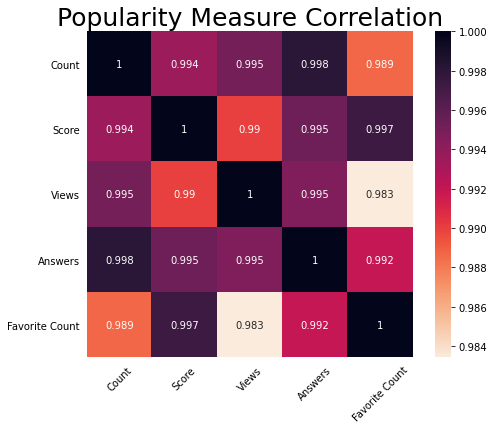

In [69]:
# creating a correlation heatmao 
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(
    tags_merged.corr(),
    annot=True,
    fmt='.3g',
    square=True,
    cmap=sns.cm.rocket_r)
ax.set_title('Popularity Measure Correlation',fontsize=25)
ax.set_title('Popularity Measure Correlation',fontsize=25)
ax.set_title('Popularity Measure Correlation',fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)

ax.tick_params(bottom=False,left=False) #刻度线不显示


We can clearly see that our assumption is confirmed: there is a very strong correlation between all the popularity measures of the tags. It means that the topics (reflected by the tag names) that stir the biggest interest among people asking questions usually attracts more views, and gathers more answers, scores, and favorite marks. An especially strong correlation is observed between scores and favorite marks. The least correlated popularity measure among all is the number of views.

Now, let's return to the TOP10 dataframes for each popularity measure created earlier, and make a plot for each.

In [70]:
# Creating a list of the Top10 dataframe
dataframes_top10 = [top10_used,
                    top10_scored,
                    top10_views,
                    top10_answered,
                    top10_favorite]
#creating a list of colors and empty list for the top10 daraframes
# with the reset index,columns to be used,plot titles,and x-axis limits

dfs = []
columns = []
titles = []
xlims = []
colors = ['magenta','gold','lime','tomato','deepskyblue']#品红，lime 石灰色

#Filling the empty lists
for df in dataframes_top10:
    dfs.append(df.copy().set_index('Tag',drop=True))
    columns.append(df.columns[1])
    titles.append(f'TOP10 Tafs by {df.columns[1]}')
    xlims.append(df.max().tolist()[1])



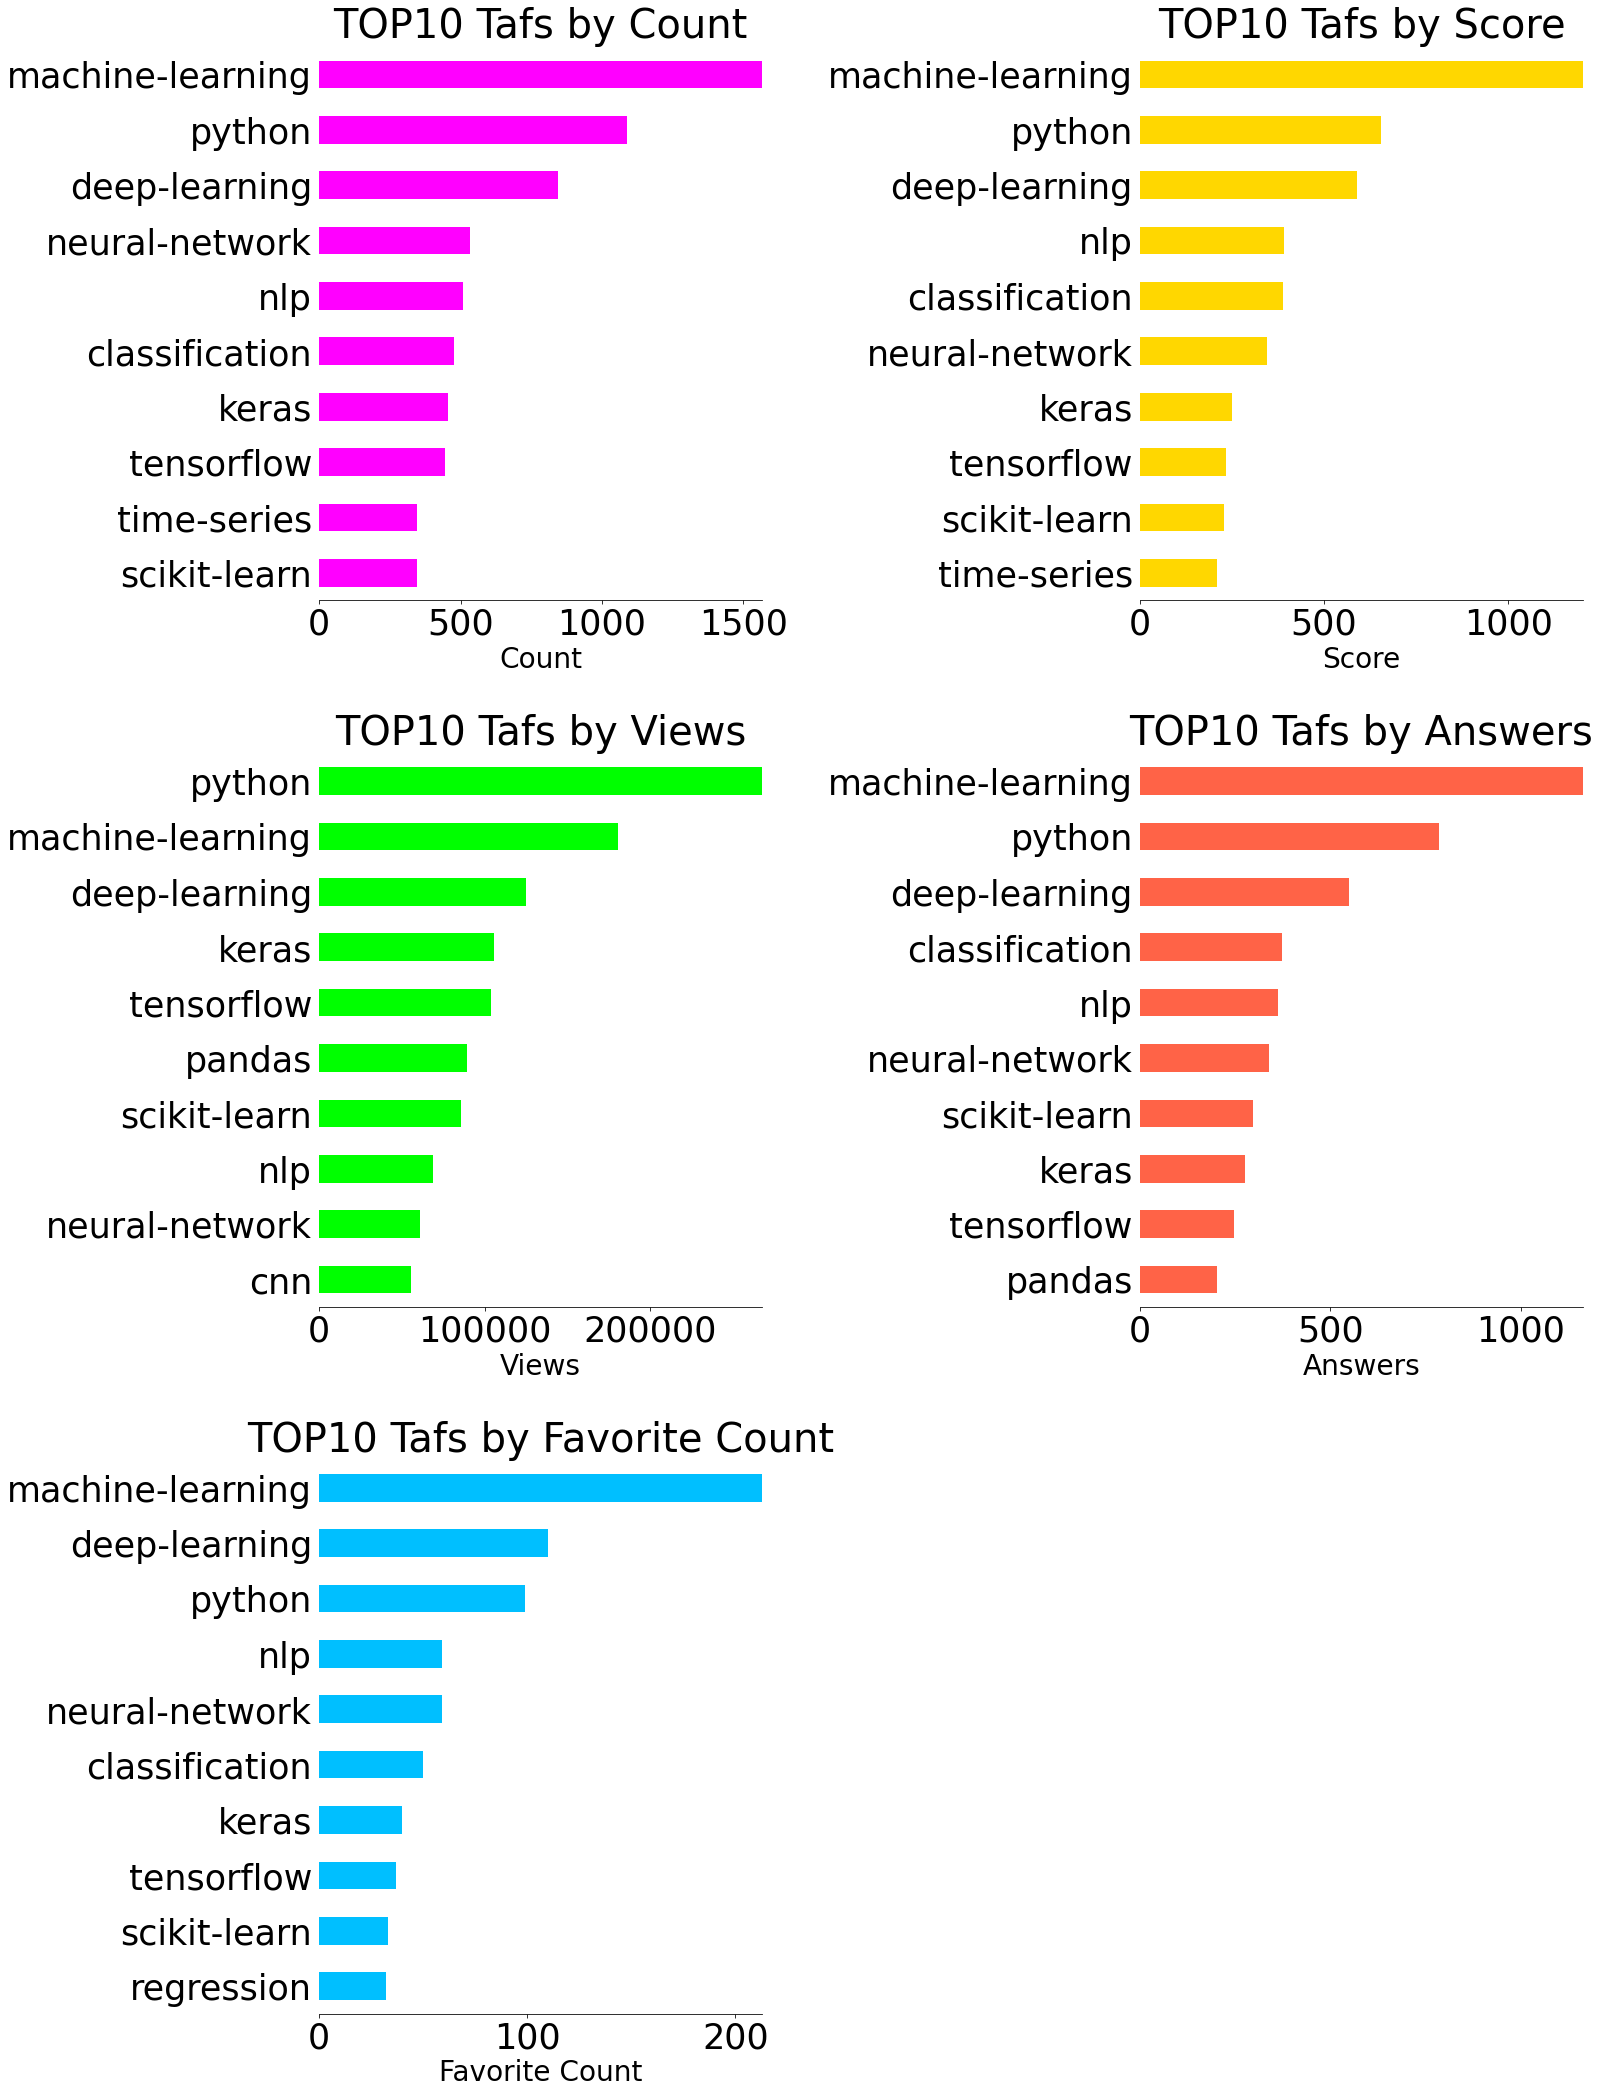

In [76]:
fig = plt.figure(figsize=(23,30))
for i in range(0,5):
    ax = fig.add_subplot(3,2,i+1)
    dfs[i][columns[i]].sort_values().plot.barh(color=colors[i],
                                                xlim = (0,xlims[i]),
                                                rot = 0)
    ax.set_title(titles[i],fontsize=40)
    ax.set_ylabel(None)
    ax.set_xlabel(columns[i],fontsize=28)
    ax.set_xlabel(columns[i],fontsize=28)
    ax.tick_params(axis='both',labelsize=35,left=False)
    for j in ['top','right','left']:
        ax.spines[j].set_visible(False)
    plt.tight_layout(pad=4)

We can make the following observations here: 
- `machine-learning` and `python` tags are evidently the most popular ones in all the TOP10 dataframes.
- The great majority of tags are presented in all the dataframes.

Based on the second observation, let's find out how many tags occur in **all** of the TOP10 dataframes.

In [78]:
# creating a merged dataframe for all the top10 dataframe
top10_merged = reduce(lambda left,right :pd.merge(left,right,on=['Tag'],how='inner'),dataframes_top10)

print('Number of tags occured in all the TOP10 dataframes:',len(top10_merged))
top10_merged

Number of tags occured in all the TOP10 dataframes: 8


,Tag,Count,Score,Views,Answers,Favorite Count
0,machine-learning,1567,1203,180469,1163,213
1,python,1089,654,268000,785,99
2,deep-learning,845,588,125215,549,110
3,neural-network,533,345,60981,340,59
4,nlp,510,390,68576,362,59
5,keras,457,250,105462,275,40
6,tensorflow,446,235,104078,248,37
7,scikit-learn,345,228,85675,298,33


Hence, in all the TOP10 dataframes, there are 9 out of 10 tags in common, which confirms once again a very strong correlation between the popularity measures. We're going to plot these 9 most popular tags together with the corresponding values of their popularuty measures, but since they all have quite different ranges, it's necessary to normalize them first. 

In [83]:
#Normalizing the merged dataframe
top10_merged_normalized =top10_merged.copy()
columns = top10_merged_normalized.columns.tolist()[1:]
for column in columns:
        top10_merged_normalized[column] =top10_merged_normalized[column] / top10_merged_normalized[column].abs().max()
top10_merged_normalized

,Tag,Count,Score,Views,Answers,Favorite Count
0,machine-learning,1.000000,1.000000,0.673392,1.000000,1.000000
1,python,0.694959,0.543641,1.000000,0.674979,0.464789
2,deep-learning,0.539247,0.488778,0.467220,0.472055,0.516432
3,neural-network,0.340140,0.286783,0.227541,0.292347,0.276995
4,nlp,0.325463,0.324190,0.255881,0.311264,0.276995
5,keras,0.291640,0.207814,0.393515,0.236457,0.187793
6,tensorflow,0.284620,0.195345,0.388351,0.213242,0.173709
7,scikit-learn,0.220166,0.189526,0.319683,0.256234,0.154930


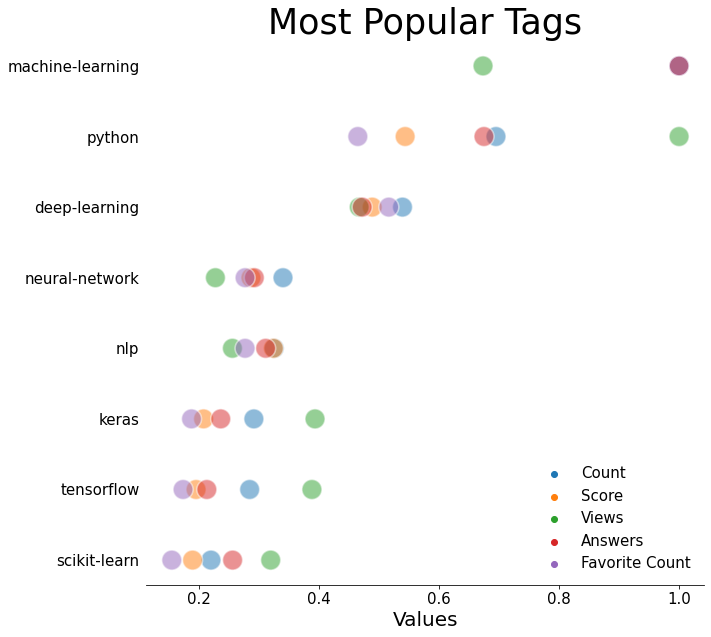

In [89]:
#creating a melted dataframe from the merged dataframe for further plotting
#https://www.geeksforgeeks.org/python-pandas-melt/     #把这个数据表格转制一下
top10_melted = pd.melt(top10_merged_normalized,id_vars=['Tag'],value_vars=columns)
#rename the columns 
top10_melted.columns=['Tag','PopularityMeasure','Value']

#Creating a dot plot for the most populart tags
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(
    data = top10_melted,
    x="Value",
    y='Tag',
    hue='PopularityMeasure',
    s=400,
    alpha=0.5
)
ax.set_title('Most Popular Tags', fontsize=35)
ax.set_xlabel('Values', fontsize=20)
ax.set_ylabel(None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(left=False)
ax.legend(loc=4, fontsize=15, frameon=False)
sns.despine(left=True)
plt.show()

We observe several things here:
- The questions with the `machine-learning` tag are by far most popular ones.
- The questions with the `python` tag gather almost as many views as those with `machine-learning`. However, they get much less answers, scores and favorite marks (while still much more than those with the other tags).
- Some other categories (`keras`, `tensorflow`, and `scikit-learn`) seem to be more viewed than answered / scored / marked.

## Engaging Domain Knowledge

All the visualizations so far showed that `machine-learning` is the most popular tag, with a big gap from all the others. This gives us a general trend, however we have to take into account that the sphere of **machine learning** itself is rather large and includes plenty of branches, approaches, and methods. It's not surprising then that so many questions are tagged with this topic, most probably, always (or almost always) in combination with some other tags. The same can be said about the tag on the second place, representing **Python**, the most popular programming language in data science and including quite a lot of things. Since our aim here is to find the best content for a data science learning resource, we should make our research narrower and more focused.

At a closer look, after some googling, we see that all the topics reflected by the 9 most popular tags above are actually all interrelated, and all can be united under a general giant topic: **Machine Learning**.
- **Deep learning** is a new area of *machine learning* research concerned with the technologies used for learning hierarchical representations of data, mainly done with *neural networks*.
- **Neural networks** are composed of programming constructs that mimic the properties of biological neurons. They are widely used in *deep learning* algorithms for solving artificial intelligence problems without the network designer having had a model of a real system.
- **Natural language processing (NLP)** is a subfield of linguistics, computer science, and artificial intelligence (a subset of which is *machine learning*) concerned with the interactions between computers and human language. A new paradigm of NLP, distinct from statistical NLP, is *deep learning* approaches based on *neural networks*. 
- **Scikit-learn** and **TensorFlow** are *machine learning* libraries,  the first one based on *Python*, the second - on *Python* and C++.
- **Keras** is a *deep learning* library that provides a *Python* interface for artificial *neural networks*.
- **Classification** is one of the algorithms of supervised *machine learning*.

From these definitions, we can discern a prospective direction for the content of our data science resource - **deep learning**. The corresponding tag, as well as those most closely related to it (`keras`and `neural-network`), goes at the 3rd place in all the TOP10 lists of the most popular tags, right after `machine-learning` and `python`. As mentioned above, it's also becoming a new concept for NLP. Finally, according to the [Wikipedia article](https://en.wikipedia.org/wiki/Machine_learning#:~:text=Machine%20learning%20(ML)%20is%20the,a%20subset%20of%20artificial%20intelligence) for machine learning:

> As of 2020, deep learning has become the dominant approach for much ongoing work in the field of machine learning.

Hence, being a relatively new, rising area, attracting more and more interest from both learners and data scientists, still quite a large topic, but already much more focused than machine learning in general, **deep learning seems to be a perfect candidate for a data science learning resource content**. 
## Analysing Interest in Deep Learning across Time
Before making final recommendations, we should confirm our findings with additional proof. Since we want to assure that the content we decide to create will be the most useful for as long as possible, we should check if the interest in deep learning is not slowing down over a longer period of time rather than only in 2020. 

To track the interest in this topic across time, we're going to return to the DSSE database and run a query that fetches all of the questions ever asked on DSSE, their dates and tags:
```
SELECT Id, 
       CreationDate, 
       Tags
  FROM posts
 WHERE PostTypeId = 1;
```
The results of this query is read in a dataframe:

In [91]:
questions_all = pd.read_csv('all_questions.csv',parse_dates=['CreationDate'])
questions_all.head()

,Id,CreationDate,Tags
0,82723,2020-10-08 07:11:59,<machine-learning><classification>
1,82727,2020-10-08 07:52:23,<clustering><anomaly-detection>
2,82728,2020-10-08 07:53:43,<machine-learning><training>
3,82729,2020-10-08 08:22:31,<python><neural-network><keras><autoencoder><g...
4,82737,2020-10-08 11:43:37,<classification><statistics>


Before starting our analysis, we have to transform the `Tags` column in a similar manner as we did earlier:

In [92]:
# Transforming values in the `Tags` column into lists of strings
questions_all['Tags'] = questions_all['Tags'].str.replace('><',',')\
                                             .str.replace('<', '')\
                                             .str.replace('>', '')\
                                             .str.split(',')

# Double-checking the results
print(questions_all.loc[2,'Tags'])
questions_all.head()

['machine-learning', 'training']


,Id,CreationDate,Tags
0,82723,2020-10-08 07:11:59,"[machine-learning, classification]"
1,82727,2020-10-08 07:52:23,"[clustering, anomaly-detection]"
2,82728,2020-10-08 07:53:43,"[machine-learning, training]"
3,82729,2020-10-08 08:22:31,"[python, neural-network, keras, autoencoder, g..."
4,82737,2020-10-08 11:43:37,"[classification, statistics]"


Now that we have our dataframe adjusted, let's extract some information from it. In particular, we're interested in finding out what tags, other than `deep-learning`, are strongly related to the deep learning sphere. In other words, we want to know what questions should be classified as deep learning questions. For this purpose, we'll create a dictionary of all the tags used in combination with the `deep-learning` tag and their corresponding frequencies, and then explore them.

In [93]:
# creating a list of all the tags ever used
all_tags = []
for lst in questions_all['Tags']:
    for item in lst:
        if item not in all_tags:
            all_tags.append(item)
#Creating a list of sets of tags for each question that has 'deeping-learning'
# as one of the tags
dl_tags = []
for lst in questions_all['Tags']:
    if 'deep-learning' in lst:
        dl_tags.append(lst)

#creating a dictionary of all the tags uesd in combination with 'deeping-learning'
# and their frequencied

dl_tags_dict = {}
for lst in dl_tags:
    for item in lst:
        if item not in dl_tags_dict:
            dl_tags_dict[item] = 0
        dl_tags_dict[item] +=1

#sorting the dictionary
sorted_dl_tags_dict = dict(sorted(
                                  dl_tags_dict.items(),
                                  reverse=True,
                                  key=operator.itemgetter(1)
))


In [94]:
# creating a list of all the tags that were used with the 'deep-learning' tags,
# but sometimes were used also without it

dl_tags_not_exclusive = []
for lst in questions_all['Tags']:
    for item in list(dl_tags_dict.keys())[1:]: #avoid checking 'deep-learning' itself
        if 'deep-learning' not in lst and item in lst and item not in dl_tags_not_exclusive:
            dl_tags_not_exclusive.append(item)
        

In [96]:
print('Number of all the questions in the DSSE:',  '\n',
      len(questions_all), '\n', '\n',
      'Number of questions with the `deep-learning` tag:', '\n', 
      len(dl_tags), '\n', '\n',
      'Overall number of all the tags in the DSSE database:', '\n', 
      len(all_tags), '\n', '\n',
      'Number of unique tags associated with `deep-learning`:',  '\n', 
      len(dl_tags_dict), '\n','\n',
      'Number of unique tags associated with `deep-learning`, but sometimes used without:', '\n',
      len(dl_tags_not_exclusive), '\n', '\n',  
      sorted_dl_tags_dict)

Number of all the questions in the DSSE: 
 33546 
 
 Number of questions with the `deep-learning` tag: 
 4490 
 
 Overall number of all the tags in the DSSE database: 
 668 
 
 Number of unique tags associated with `deep-learning`: 
 433 
 
 Number of unique tags associated with `deep-learning`, but sometimes used without: 
 428 
 
 {'deep-learning': 4490, 'machine-learning': 1857, 'neural-network': 1356, 'keras': 794, 'tensorflow': 639, 'python': 530, 'cnn': 501, 'nlp': 350, 'lstm': 302, 'classification': 298, 'convolutional-neural-network': 267, 'computer-vision': 252, 'image-classification': 207, 'rnn': 194, 'time-series': 161, 'pytorch': 145, 'reinforcement-learning': 119, 'dataset': 114, 'convolution': 112, 'loss-function': 107, 'training': 105, 'object-detection': 102, 'gan': 91, 'autoencoder': 90, 'regression': 90, 'data-mining': 88, 'machine-learning-model': 88, 'transformer': 82, 'predictive-modeling': 74, 'gradient-descent': 66, 'optimization': 63, 'data-science-model': 63, '

From the statistics above, we can make the following observations:
-  14% of all the questions in the DSSE database are tagged with `deep-learning`,
- 43% of all the unique tags were ever used in combination with `deep-learning`,
- **almost all of the tags (99%) associated with `deep-learning` were used at least once without it**. 

The last insight is especially important for us, since it means that there definitely should be some questions not tagged with `deep-learning`, but having some other tags strongly related to the deep learning sphere (for example, representing some specific libraries or methods). Hence, returning to the 1st observation, in reality we should have more (presumably, much more) than 13% of questions related to deep-learning.


Our next step is exactly to find those tags specific only to the deep learning sphere. Since the dictionary of the unique tags associated with the `deep-learning` tag contains quite a big but still manageable amount of items (381), we can decide not to apply correlation techniques, but instead try to deal with these tags manually. Despite this approach is definitely more time-consuming, we can ensure getting more value out of the data. The algorithm is the following:
- Excluding generic and obviously non-specific tags (fortunately for our task, there are quite a lot of them: `kaggle`, `education`, `java`, `parsing`, `career`, etc.). This includes also `machine-learning` and `python`.
- Excluding the tags that can be related both to deep learning and to the "classical" machine learning: `k-nn`, `classifier`, `roc`, `overfitting`, `logistic-regression`, `scikit-learn`, etc. At this step, we'll use our domain knowledge and google information in all ambiguous cases. The idea here is to be rather conservative and keep **only** those tags that are **uniquely related to deep learning**.

Below is the resulting dictionary:

In [39]:
dl_related_tags = {
                   'deep-learning': 3544,
                   'neural-network': 1143,
                   'keras': 665,
                   'cnn': 409,
                   'lstm': 240,
                   'convnet': 191,
                   'rnn': 133,
                   'autoencoder': 77,
                   'gan': 71,
                   'recurrent-neural-net': 55,
                   'backpropagation': 54,
                   'activation-function': 48,
                   'gpu': 42,
                   'deep-network': 39,
                   'dqn': 30,
                   'yolo': 28,
                   'mlp': 24,
                   'attention-mechanism': 23,
                   'dropout': 22,
                   'vgg16': 15,
                   'inception': 14,
                   'mini-batch-gradient-descent': 12,
                   'faster-rcnn': 11,
                   'gru': 10,
                   'caffe': 10,
                   'perceptron': 8,
                   'rbm': 8,
                   'stacked-lstm': 6,
                   'inceptionresnetv2': 6,
                   'ann': 6,
                   'alex-net': 6,
                   'siamese-networks': 5,
                   'neural-style-transfer': 4,
                   'pooling': 4,
                   'graph-neural-network': 4,
                   'vae': 3,
                   'fastai': 3,
                   'cs231n': 3,
                   'pretraining': 2,
                   'tflearn': 2,
                   'gnn': 2,
                   'allennlp': 1,
                   'rmsprop': 1,
                   'keras-rl': 1,
                   'pytorch-geometric': 1,
                   'mxnet': 1,
                  }

print('Number of tags specific to deep learning: ', len(dl_related_tags))

Number of tags specific to deep learning:  46


Since we're going to track the interest in deep learning across time, let's take a look at the `CreationDate` column of our dataframe. In particular,we're interested in the dates of the first and the last(currently) questions on the DSSE.

In [97]:
print('First question asked',questions_all['CreationDate'].min(),
        '\n',
        'Last question asked',questions_all['CreationDate'].max())

First question asked 2014-05-13 23:58:30 
 Last question asked 2022-06-12 02:49:12


Google resources (for example, [this article](https://arxiv.org/pdf/1702.07800.pdf) and many others) show that the era of deep learning started in 2006. As we can see, the first question on the DSSE was asked in 2014, i.e. much later, so we can easily use the infomation from our dataframe starting exactly from the first question, not being worried about any potential discrepancies in the dates. As for the upper limit of our timeframe, we have to decide first on the time periods into which to divide the data. Quarters seem to be a good choice for our purposes, hence, since now it's January 2021, we have to exclude all the questions starting from the 1st of January 2021 inclusive, for the sake of consistency.

In [98]:
#removing all the entries related to 2021 
questions_all = questions_all[questions_all['CreationDate'].dt.year<2022]

Now, we're going to add to our dataframe 2 additional columns for further plotting: 
- `DL`- showing if a tag is related to deep learning or not,
- `YearQuarter` - representing the year and the quarter when each question was asked.

In [99]:
# Creating a list from the dictionary of the tags associated with learning 
dl_related_tag_list = list(dl_related_tags.keys())

#defining a function for labeling questions as related to deep learning or not
def classify_dl(tags):
    for tag in tags:
        if tag in dl_related_tag_list:
            return 1
    return 0

#defing a function for extracting the year
def extract_year_quarter(dt):
    quarter = ((dt.month-1)//3)+1#取整
    return f'{dt.year}_Q_{quarter}'

#creating the columns 'DL' and YearQuarter
questions_all['DL'] = questions_all['Tags'].apply(classify_dl)
questions_all['YearQuarter'] = questions_all['CreationDate'].apply(extract_year_quarter)

Let's create a dataframe summarizing questions by quarter.

In [100]:
questions_by_quarter = questions_all.groupby('YearQuarter').agg({'DL':['sum','count']})
#renaming the columns 
questions_by_quarter.columns = ['dl_questions','all_questions']

#adding a columns representing % of deep learning related questions
#by quarter

questions_by_quarter['dl_questions_percent'] = \
    100*questions_by_quarter['dl_questions']/questions_by_quarter['all_questions']

#resetting the index
questions_by_quarter.reset_index(inplace=True)
questions_by_quarter.sample(5)

,YearQuarter,dl_questions,all_questions,dl_questions_percent
30,2021_Q_4,412,1471,28.008158
8,2016_Q_2,85,510,16.666667
2,2014_Q_4,15,214,7.009346
15,2018_Q_1,471,1199,39.282736
1,2014_Q_3,9,188,4.787234


Finally,we can plot the results by quarter

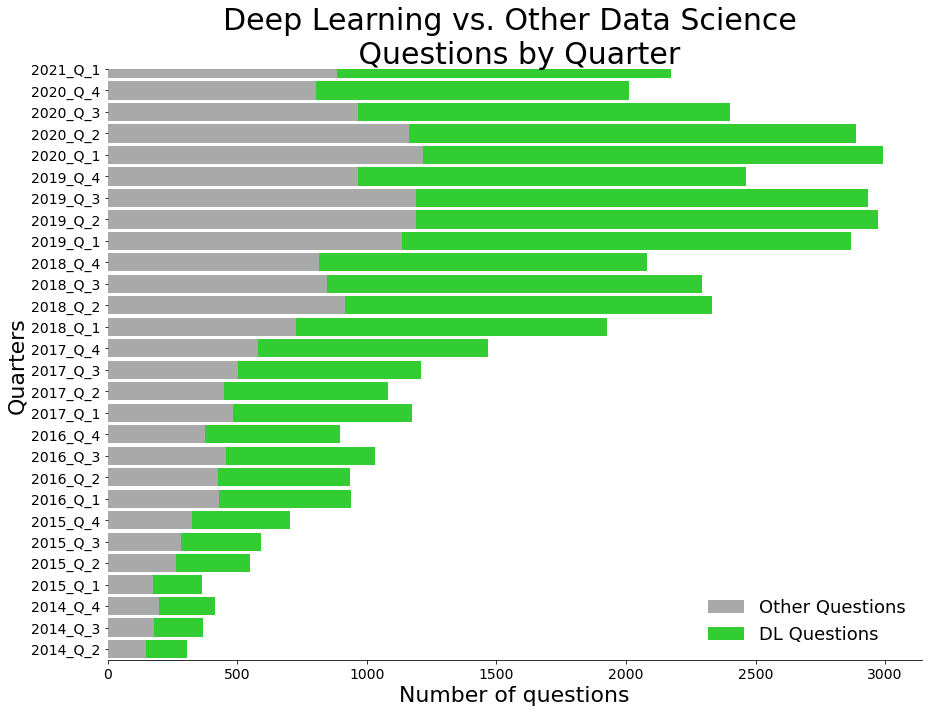

In [106]:
# CREATING A STACKED HORIZONTAL BAR PLOT FOR DL-RELATED AND OTHER QUESTIONS

#number of bars
N=len(questions_by_quarter)

#data to plot
other_Q = questions_by_quarter['all_questions']-questions_by_quarter['dl_questions']
dl_Q = questions_by_quarter['all_questions']

#X locations for the groups
ind = np.arange(N)

#bar width
width=0.85
#ploting the result 
fig = plt.figure(figsize=(13,10))
p1 = plt.barh(ind,other_Q,width,color = 'darkgray')
p2 = plt.barh(ind, 
              dl_Q, 
              width, 
              color = 'limegreen',
              left=other_Q)

plt.title('Deep Learning vs. Other Data Science \n Questions by Quarter', fontsize = 30)
plt.xlabel('Number of questions', fontsize=22)
plt.ylabel('Quarters', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(ind, questions_by_quarter['YearQuarter'], fontsize=14)
plt.legend(
           (p1[0], p2[0]), 
           ('Other Questions', 'DL Questions'), 
           frameon=False, 
           fontsize=18, 
           loc=4
           )
plt.ylim(-0.5,27)
plt.tight_layout()
sns.despine(left=True)
plt.show()
print('\n')

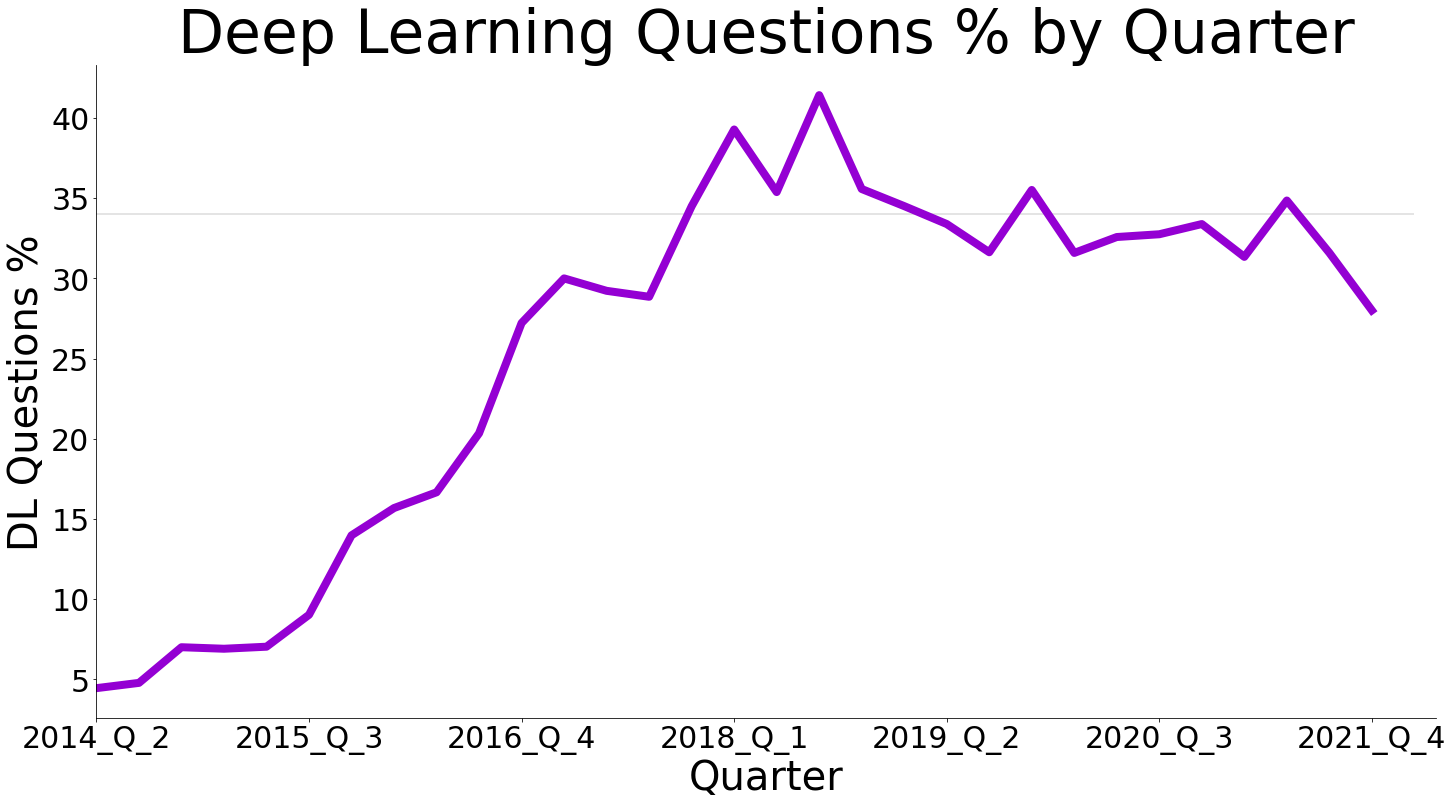

In [104]:
questions_by_quarter.plot(
    figsize=(24,12),
    x='YearQuarter',
    y='dl_questions_percent',
                          kind='line', 
                          xlim=0, 
                          linestyle='-', 
                          color='darkviolet', 
                          lw=8,
                          fontsize=30, 
                          legend=False
)
plt.xlabel('Quarter', fontsize=40)
plt.ylabel('DL Questions %', fontsize=40)
plt.title('Deep Learning Questions % by Quarter', fontsize=60)
plt.hlines(
           y=34, 
           xmin=0, 
           xmax=N,
           color='gainsboro',
           )
sns.despine()

These 2 graphs give us some interesting insights:
- The number of data science questions in general has been constantly increasing over the whole time of existence of the DSSE (from 2014). A noticeable breakthrough happened in the beginning of 2018 (as a possible way forward, it could be interesting to investigate potential reasons for this growing of interest).
- A curious evident peak in the number of data science questions happened in the 2nd quarter of 2020. We can assume that the reason here was the outbreak of the COVID-19 pandemia and subsequent lockdowns in many countries. Hence, more people became interested in online-learning, getting certified, improving professional skills or even learning a new profession. Also, the opportunity to work online suddenly became very important. Hence, for learning new skills, the preference was given to those ones that could permit working remotedly, and data science is one of such spheres.
- The percentage of deep learning questions was also constantly growing, up until middle of 2018, when it reached a plateau of 34%, which is still continuing, with a slight trend of growing. 
- Earlier in this project, we saw that 13% of all the questions in the DSSE database are tagged with `deep-learning`. The last 2 graphs clearly show that, with taking into account the other tags closely related to deep learning, the overall percentage of deep learning questions is definitely much higher. Let's confirm it:

In [108]:
# Counting the questions containing DL-related tags
dl_counter = 0
for lst in questions_all['Tags']:
    
    # Checking the intersection of `lst` and `dl_related_tags_list`
    if len(list(set(lst) & set(dl_related_tag_list))) > 0:
        dl_counter += 1
  
print(f'Overall percentage of DL-related questions: {round(dl_counter/len(questions_all)*100)}%')

Overall percentage of DL-related questions: 31%


## Conclusion
In this project, we explored the database of Data Science Stack Exchange, with the goal to figure out the most popular data science questions, and, consequently, the best content for a data science learning resource. We focused on the most recent questions (2020) and then, to assure that the content we decide to create will be the most useful for as long as possible, we checked our findings over the whole period of existence of the DSSE (excluding just started 2021). The main approach was to explore the tags and the popularity measures related to the questions tagged with them: number of answers, views, scores, and favorite marks.

As a result, we found out that **deep learning is the most prospective direction for the content of our data science resource**. Being a relatively new, rising area of machine learning, but already representing the dominant approach for much ongoing work in this field, attracting more and more interest from both learners and data scientists, still quite a large topic, but much more focused than machine learning in general, deep learning seems to be a perfect candidate for our purposes.

Some insights and numbers obtained in this project:
- The number of data science questions in general has been constantly increasing over the whole time of existence of the DSSE (from 2014). There was a noticeable breakthrough in the beginning of 2018 and an evident peak in the 2nd quarter of 2020, the latter potentially related to the outbreak of the COVID-19 pandemia, subsequent lockdowns and growing interest in online learning, in particular in learning data science. 
- The percentage of deep learning questions was constantly growing up until middle of 2018, when it reached a plateau of 34%, which is still continuing, with a slight trend of growing. This means that the interest in deep learning is not slowing down over a long period of time.
- The overall percentage of all deep learning related questions on the DSSE is 32%.

### Way forward:
- In addition to analysing DSSE, we can consider leveraging other Stack Exchange sites listed in the introduction. Some of them are directly related to data science (Stack Overflow, Artificial Intelligence), the others to  mathematics and especially to statistics (Cross Validated), as a mathematical field most relevant to data science. 
- It could be interesting to investigate potential reasons for the growing interest in data science in the beginning of 2018.
- Another curious direction to take for investigating the most popular data science questions could be to look in more detail at "hot" and "bountied" questions.